# Análise do consumo de cerveja em São Paulo

O objetivo desse trabalho é demonstrar os impactos das variaveis no consumo de bebida, em uma determinada região. Além disso, será realizada a previsão do consumo para determinados cenários. Os dados foram coletatos em 2015 na cidade de São Paulo, em uma área rodeada por universidades, onde ocorrem festas com grupos de estudante na faixa etária dos 18 aos 28 anos, em média.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
url = "https://raw.githubusercontent.com/lorransr/beer_sp/master/Consumo_cerveja.csv"
raw = pd.read_csv(url)

In [442]:
raw.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [443]:
raw.shape

(941, 7)

In [0]:
df = raw
df.columns = ["data","t_media","t_minima","t_maxima", "precipitacao", "fim_de_semana","consumo"]

In [445]:
df.dtypes

data              object
t_media           object
t_minima          object
t_maxima          object
precipitacao      object
fim_de_semana    float64
consumo          float64
dtype: object

as variaveis "t_media", "t_minima", "t_maxima" e "precipitacao", estão com virgulas ao inves de pontos como separador decimal

In [446]:
df[df.isnull()]

,data,t_media,t_minima,t_maxima,precipitacao,fim_de_semana,consumo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.dropna(inplace = True)

In [448]:
df.shape

(365, 7)

In [0]:
def to_float(string):
    return float(str(string).replace(",","."))

df["t_media"] = df['t_media'].apply(to_float)
df["t_minima"] = df['t_minima'].apply(to_float)
df["t_maxima"] = df['t_maxima'].apply(to_float)
df["precipitacao"] = df['precipitacao'].apply(to_float)

In [0]:
# Transformando a variavel data em datetime
import datetime
df.data = pd.to_datetime(df.data)

In [0]:
# extraindo dia, mes e dia da semana
df["mes"] = df.data.dt.month
df["dia"] = df.data.dt.day
df["dia_semana"] = df.data.dt.dayofweek

In [0]:
#imputando os dias da semana
dia_semana_nome = {0:"segunda-feira",1:"terça-feira",2:"quarta-feira",3:"quinta-feira",4:"sexta-feira",5:"sabado",6:"domingo"}
df["dia_semana_nome"] = df['dia_semana'].map(dia_semana_nome) 

In [0]:
#simplificações das estações do ano
estacoes = {1:"verão",2:"verão",3:"verão",
            4:"outono",5:"outono",6:"outono",
            7:"inverno",8:"inverno",9:"inverno",
            10:"primavera",11:"primavera",12:"primavera"}

mes_nome = {1:"jan",2:"fev",3:"mar",
            4:"abr",5:"mai",6:"jun",
            7:"jul",8:"ago",9:"set",
            10:"out",11:"nov",12:"dez"}

In [0]:
# imputando as estaçoes do ano
df["estacao"] = df['mes'].map(estacoes) 

In [0]:
df["mes_nome"] = df['mes'].map(mes_nome) 

In [0]:
# criando uma variavel categorica indicando se é dia da semana ou nao
df["fim_de_semana_categ"] = df["fim_de_semana"].apply(lambda x: "fim de semana" if x > 0 else "dia de semana")

In [0]:
# criando uma variavel categorica indicando se choveu ou não
df["choveu"] = df["precipitacao"].apply(lambda x: "choveu" if x > 0 else "não choveu")

In [0]:
#criando as dummies de estacao
#estacoes_dummies = pd.get_dummies(df["estacao"],drop_first = True)
#df = pd.merge(left = df, right =estacoes_dummies, left_index = True,right_index = True,copy=False)

In [459]:
#visualizando a cara da tabela
df.head()

,data,t_media,t_minima,t_maxima,precipitacao,fim_de_semana,consumo,mes,dia,dia_semana,dia_semana_nome,estacao,mes_nome,fim_de_semana_categ,choveu
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1,1,3,quinta-feira,verão,jan,dia de semana,não choveu
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1,2,4,sexta-feira,verão,jan,dia de semana,não choveu
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1,3,5,sabado,verão,jan,fim de semana,não choveu
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1,4,6,domingo,verão,jan,fim de semana,choveu
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1,5,0,segunda-feira,verão,jan,dia de semana,não choveu


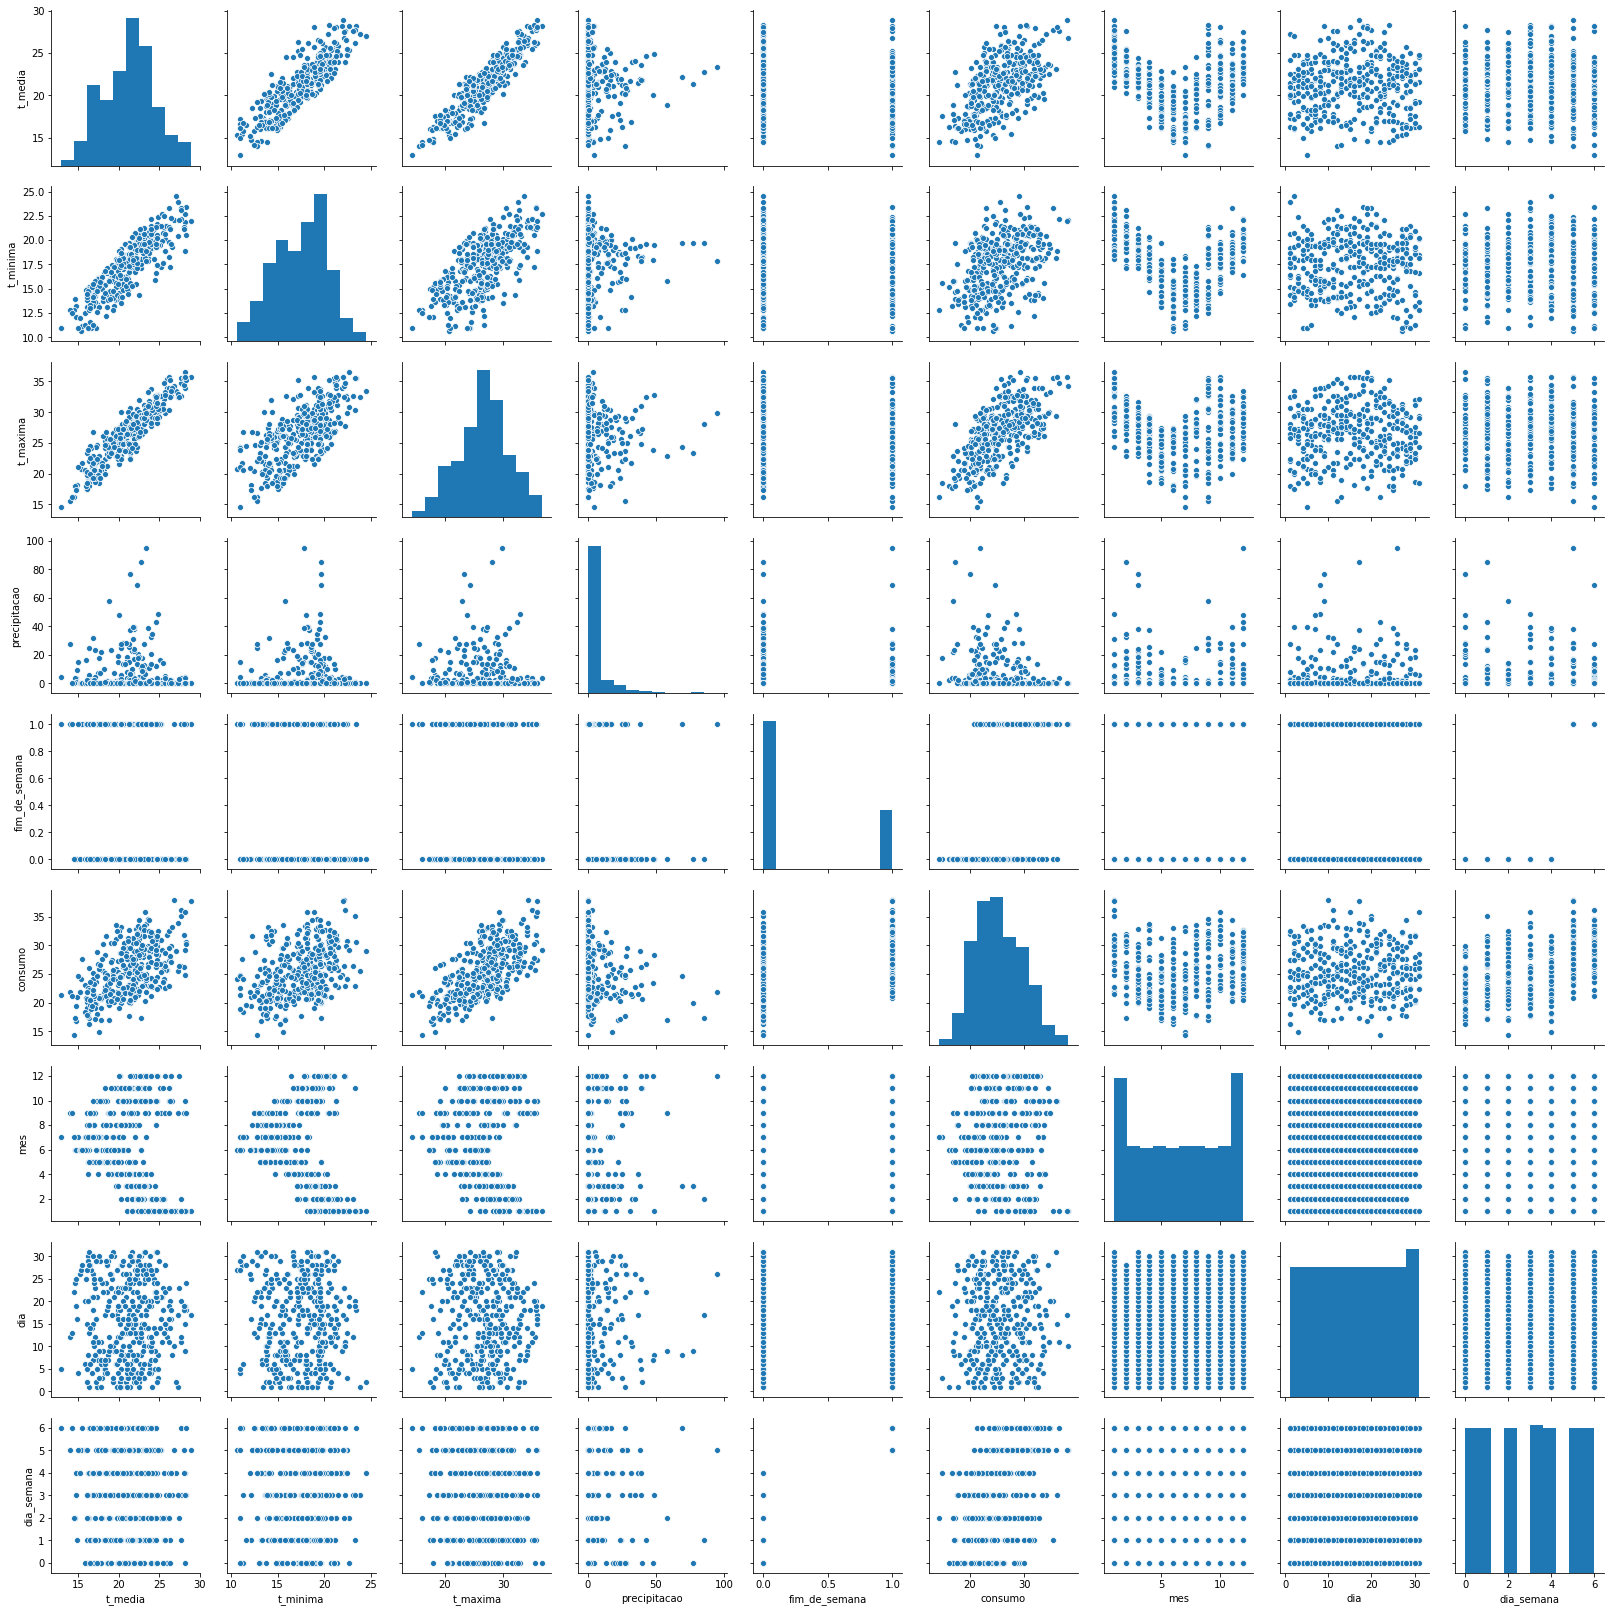

In [460]:
sns.pairplot(data = df)

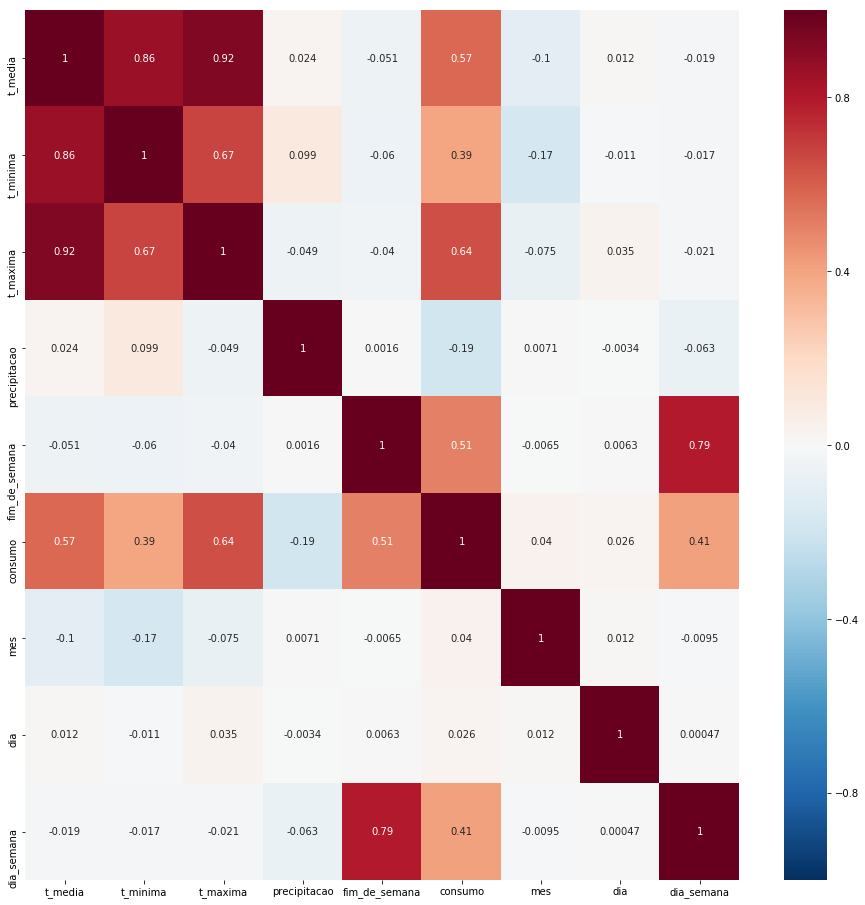

In [461]:
corr = df.corr()

plt.figure(figsize = (16,16))

# plot the heatmap
sns.heatmap(corr,
            annot=True,
            cmap = "RdBu_r",
            vmin = -1,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

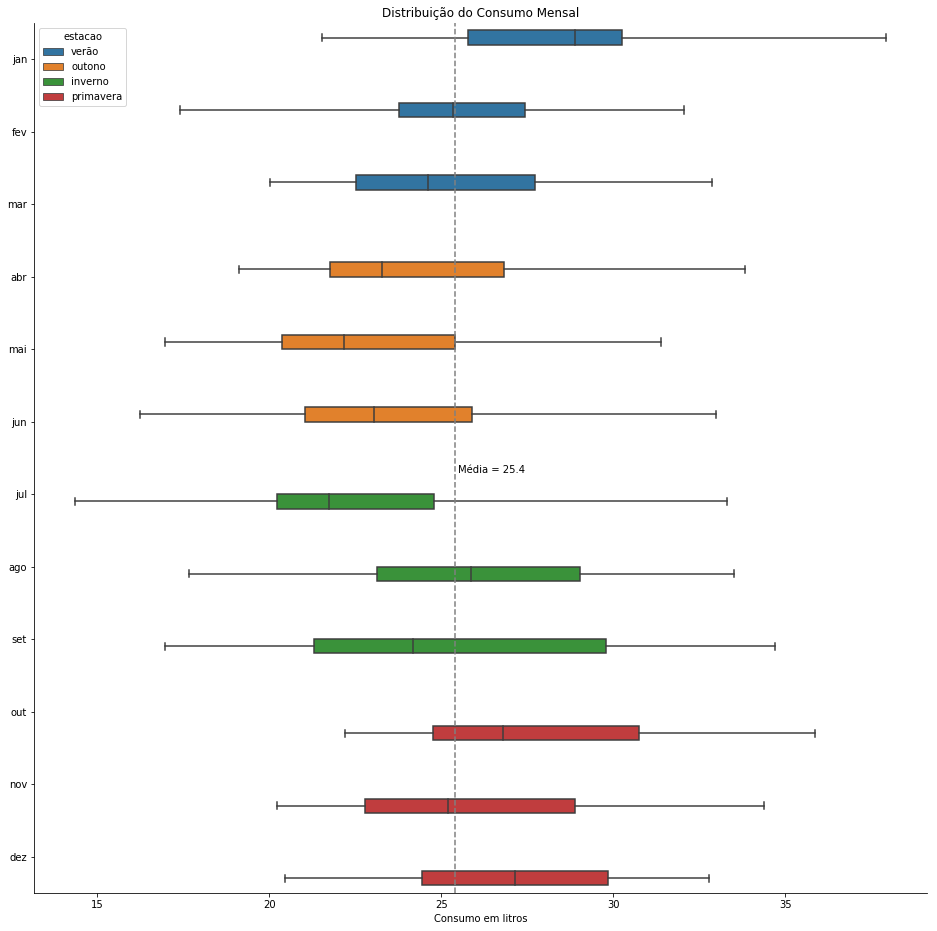

In [462]:
f, ax = plt.subplots(figsize=(16, 16))

sns.boxplot(x="consumo",
            y="mes_nome",
            data=df,
            hue = "estacao",
            whis="range")


# Tweak the visual presentation
plt.axvline(df["consumo"].mean(),color = "grey",linestyle = "--")

media_consumo = np.round(df["consumo"].mean(),1)
plt.text(media_consumo+0.1,5.7,'Média = %s' %media_consumo)
ax.set(ylabel="",xlabel = "Consumo em litros")
ax.set_title("Distribuição do Consumo Mensal")
sns.despine()

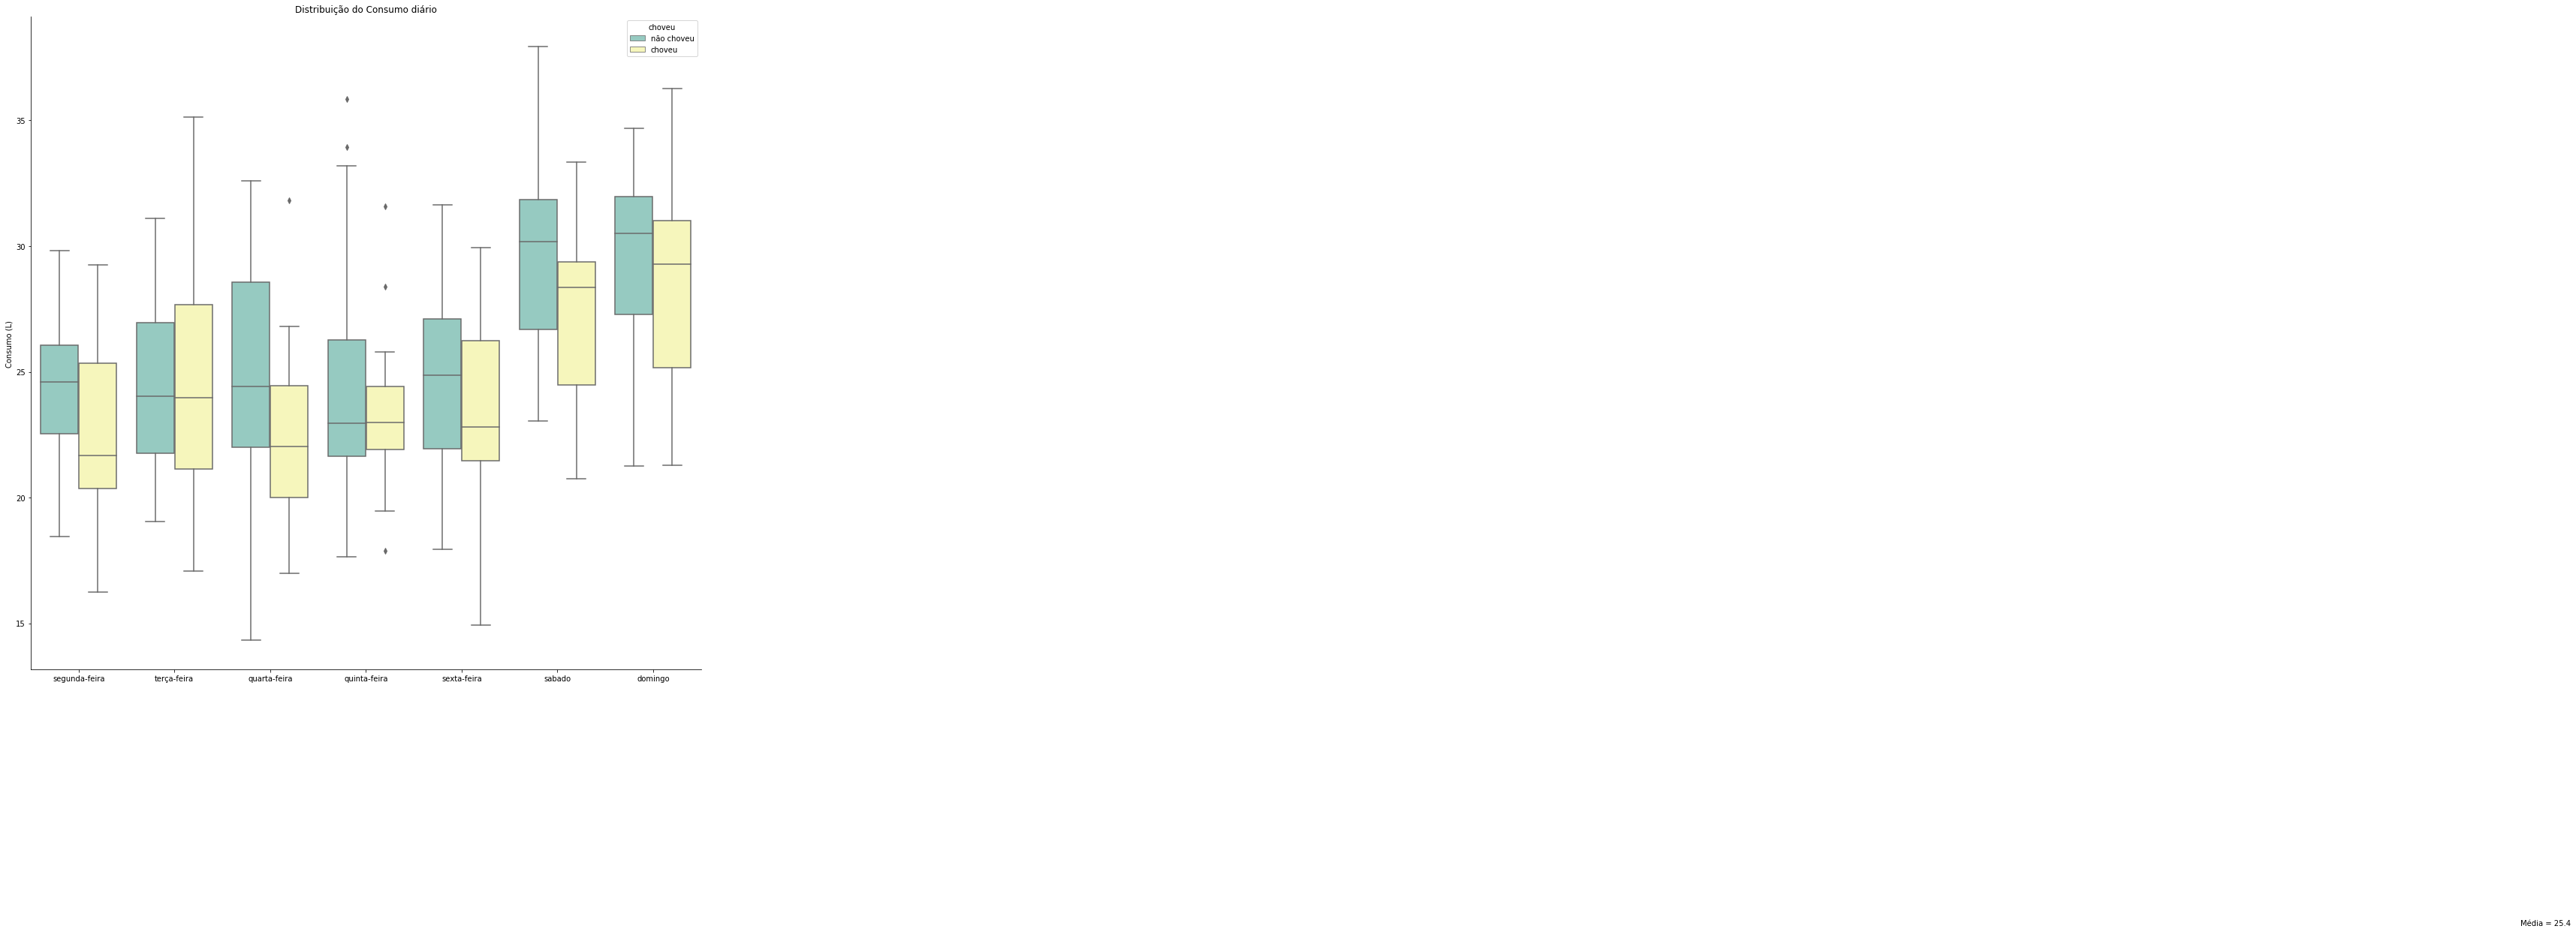

In [463]:
f, ax = plt.subplots(figsize=(16, 16))

sns.boxplot(y="consumo",
            x="dia_semana_nome",
            order=['segunda-feira',
                   'terça-feira',
                   'quarta-feira',
                   "quinta-feira",
                   "sexta-feira",
                   "sabado",
                   "domingo"],
            hue = "choveu",
            palette = "Set3",
            data=df)


# Tweak the visual presentation
plt.axvline(df["consumo"].mean(),color = "grey",linestyle = "--")

media_consumo = np.round(df["consumo"].mean(),1)
plt.text(media_consumo+0.1,3.,'Média = %s' %media_consumo)
ax.set(ylabel="Consumo (L)",xlabel = "")
ax.set_title("Distribuição do Consumo diário")
sns.despine()

In [464]:
df.columns

Index(['data', 't_media', 't_minima', 't_maxima', 'precipitacao',
       'fim_de_semana', 'consumo', 'mes', 'dia', 'dia_semana',
       'dia_semana_nome', 'estacao', 'mes_nome', 'fim_de_semana_categ',
       'choveu'],
      dtype='object')

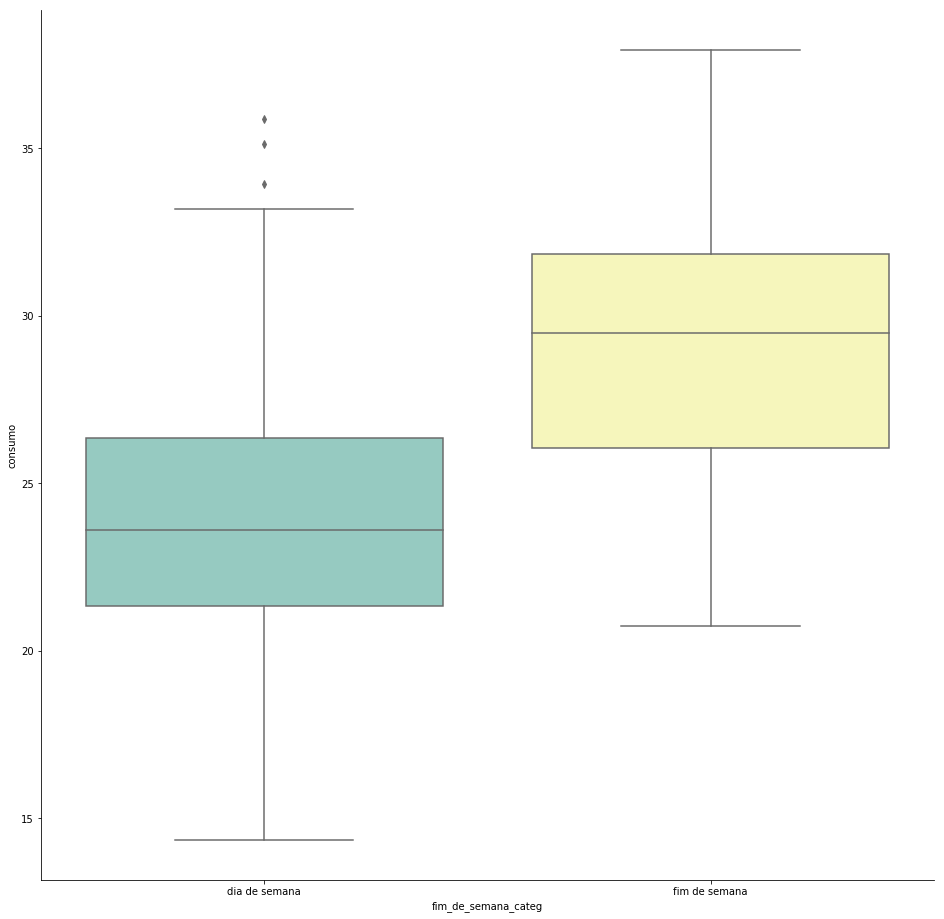

In [465]:
f, ax = plt.subplots(figsize=(16, 16))

sns.boxplot(x="fim_de_semana_categ",
            y = "consumo",
            palette = "Set3",
            data=df)
sns.despine()

In [466]:
df.groupby("fim_de_semana_categ")["consumo"].describe()

,count,mean,std,min,25%,50%,75%,max
fim_de_semana_categ,,,,,,,,
dia de semana,261.0,23.998222,3.787527,14.343,21.327,23.6140,26.36200,35.861
fim de semana,104.0,28.922721,3.830191,20.738,26.045,29.4825,31.83375,37.937


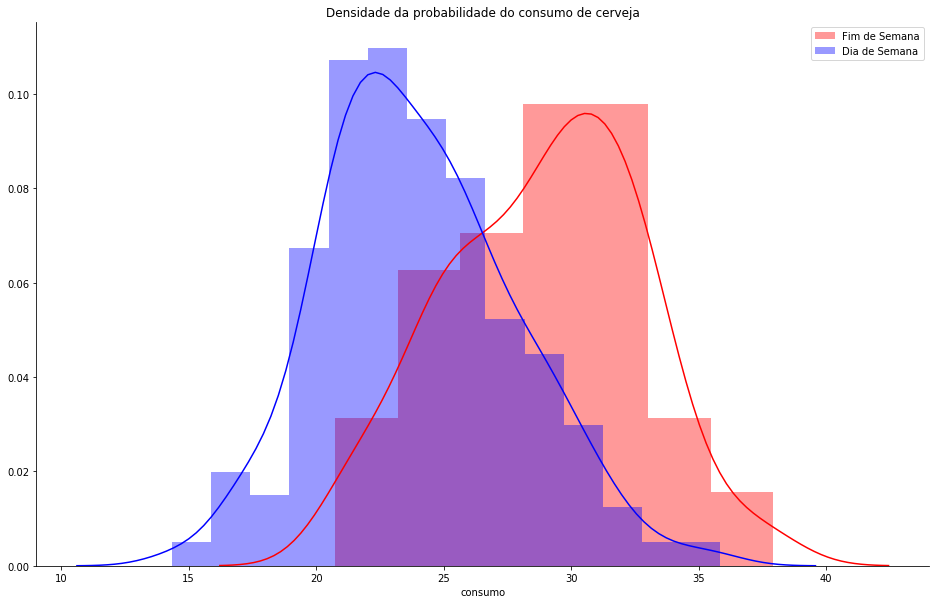

In [467]:
plt.figure(figsize=(16,10))
ax = sns.distplot(df[df["fim_de_semana"]==1].consumo,color="red")
ax = sns.distplot(df[df["fim_de_semana"]==0].consumo,color="blue")
plt.legend(labels=['Fim de Semana','Dia de Semana'])
plt.title(label = "Densidade da probabilidade do consumo de cerveja")
sns.despine()

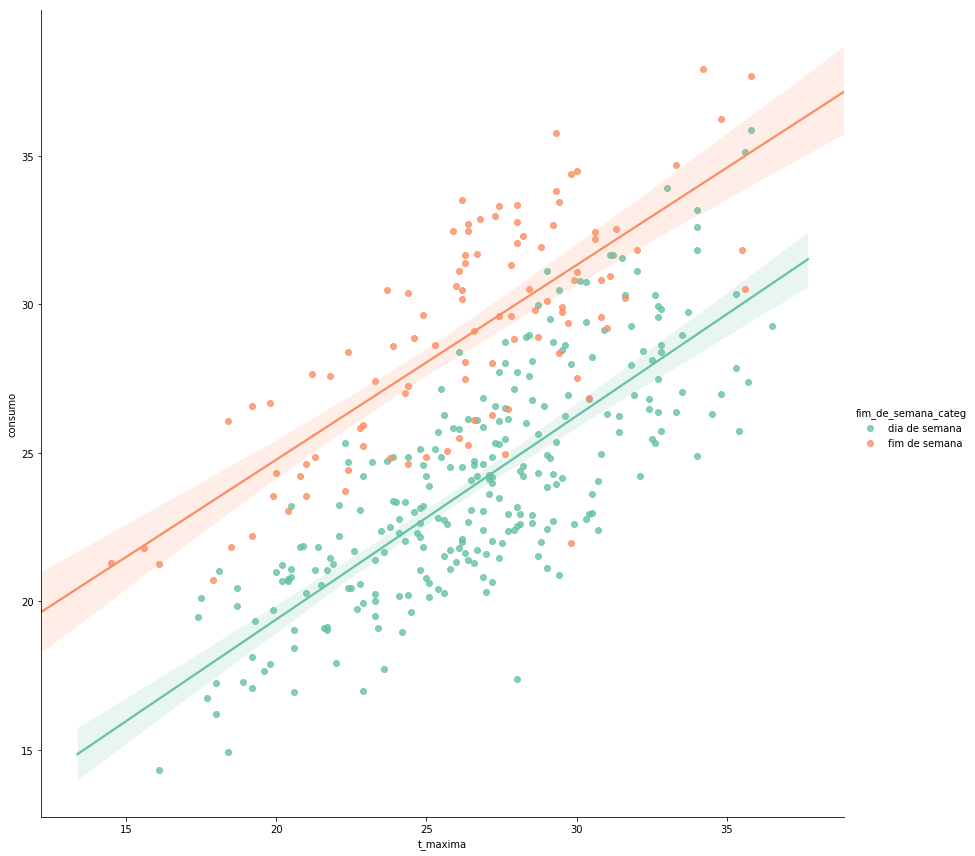

In [468]:
sns.lmplot(x="t_maxima",
           y="consumo",
           hue="fim_de_semana_categ",
           height = 12,
           palette="Set2", data=df)

In [0]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics  import mean_squared_error,r2_score

In [470]:
choosen_values = ["t_maxima","precipitacao","fim_de_semana","mes"]

X = df[choosen_values]
X.fim_de_semana = X.fim_de_semana.astype("int64") 
y = df['consumo'].values

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [471]:
X.mes.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [0]:
oneH = OneHotEncoder(sparse=False,categorical_features = [3])
sSC = StandardScaler()

In [473]:
oneH.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 1. ,  0. ,  0. , ..., 32.5,  0. ,  0. ],
       [ 1. ,  0. ,  0. , ..., 33.5,  0. ,  0. ],
       [ 1. ,  0. ,  0. , ..., 29.9,  0. ,  1. ],
       ...,
       [ 0. ,  0. ,  0. , ..., 24.1, 10.3,  0. ],
       [ 0. ,  0. ,  0. , ..., 22.4,  6.3,  0. ],
       [ 0. ,  0. ,  0. , ..., 29. ,  0. ,  0. ]])

In [474]:
X = oneH.fit_transform(X)
X = sSC.fit_transform(X)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
X = X[:,1:]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True )

In [0]:
def info(yTest_, pred_,sg = 'X'):
    ''' Return resultados '''
    
    print(f'''
{sg}    
    
{'-' * 65}
          
Mean squared error | {mean_squared_error(yTest_,pred_)}
r2 Score           | {r2_score(yTest_, pred_)}        
          
{'.' * 65}
y-test max         | {y_test.max()}
y-test min         | {y_test.min()}
y-test mean        | {y_test.mean()} 
y-test var         | {y_test.var()}
{'.' * 65}
                
Prediction {sg} max  | {pred_.max()}
Prediction {sg} min  | {pred_.min()}
Prediction {sg} Mean | {pred_.mean()}
Prediction {sg} Var  | {pred_.var()}

          
{'-' * 65}
''')

In [0]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [480]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regr.predict(X_test)

In [482]:
info(y_test, y_pred, 'LinearRegression') 


LinearRegression    
    
-----------------------------------------------------------------
          
Mean squared error | 6.190332758918438
r2 Score           | 0.7206412281537662        
          
.................................................................
y-test max         | 37.937
y-test min         | 14.94
y-test mean        | 26.314383561643833 
y-test var         | 22.159077798085946
.................................................................
                
Prediction LinearRegression max  | 34.43524903652777
Prediction LinearRegression min  | 17.60383363676196
Prediction LinearRegression Mean | 26.288287232443494
Prediction LinearRegression Var  | 16.337698403741996

          
-----------------------------------------------------------------



In [483]:
list(zip(["fev","mar","abr","mai","jun","jul",
          "ago","set","out","nov","dez","t_max",
          "precipitacao","fim_de_semana"], regr.coef_))

[('fev', -0.38287359661410914),
 ('mar', -0.2633156740672222),
 ('abr', -0.16363375728787843),
 ('mai', -0.22961003257833978),
 ('jun', 0.03565248509700725),
 ('jul', -0.20882167127054269),
 ('ago', 0.049191556922193735),
 ('set', -0.13726991700675106),
 ('out', 0.35783360444862755),
 ('nov', -0.021583777144550675),
 ('dez', 0.2367883229594706),
 ('t_max', 2.762197556008848),
 ('precipitacao', -0.49087531491032266),
 ('fim_de_semana', 2.372120066311397)]

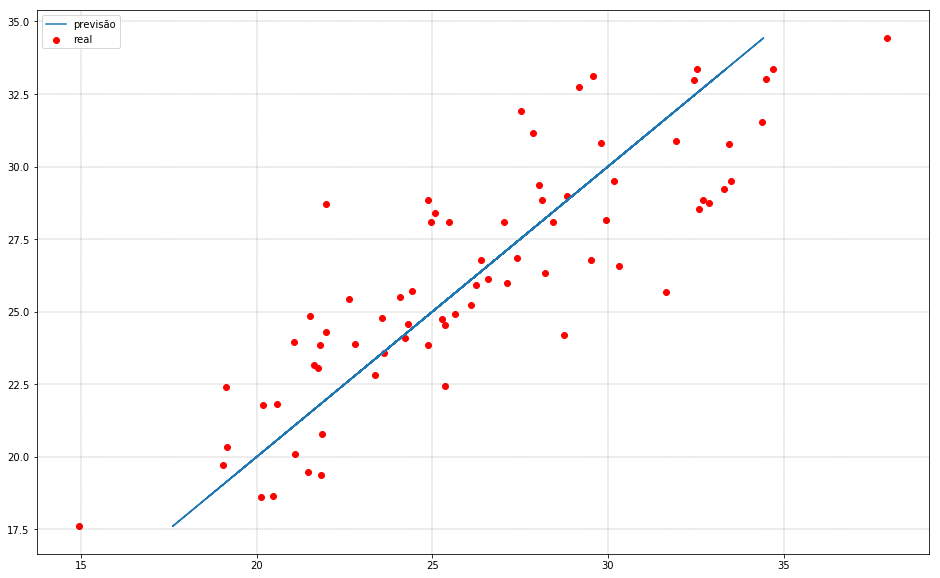

In [484]:
plt.figure(figsize=(16, 10))

plt.plot(y_pred,y_pred)
plt.scatter(y_test,y_pred, c='r', marker='o')
plt.legend(['previsão','real'])
plt.grid(ls='-.', lw=0.2, c='k');

In [495]:
choosen_values = ["t_maxima","precipitacao","fim_de_semana"]

X = df[choosen_values]
X.fim_de_semana = X.fim_de_semana.astype("int64") 
y = df['consumo'].values

#oneH = OneHotEncoder(categorical_features=[2])
sSC = StandardScaler()

#X = oneH.fit_transform(X).toarray()
X = sSC.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True )

regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

info(y_test, y_pred, 'LinearRegression') 


LinearRegression    
    
-----------------------------------------------------------------
          
Mean squared error | 5.665219419324972
r2 Score           | 0.7443386646797042        
          
.................................................................
y-test max         | 37.937
y-test min         | 14.94
y-test mean        | 26.314383561643833 
y-test var         | 22.159077798085946
.................................................................
                
Prediction LinearRegression max  | 34.38555090077522
Prediction LinearRegression min  | 17.888219385921992
Prediction LinearRegression Mean | 26.300705728390614
Prediction LinearRegression Var  | 15.070166359777188

          
-----------------------------------------------------------------



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [496]:
list(zip(choosen_values, regr.coef_))

[('t_maxima', 2.8823754207335943),
 ('precipitacao', -0.5430139582960508),
 ('fim_de_semana', 2.326856261461062)]

Text(0.5, 1.0, 'Previsão x Teste')

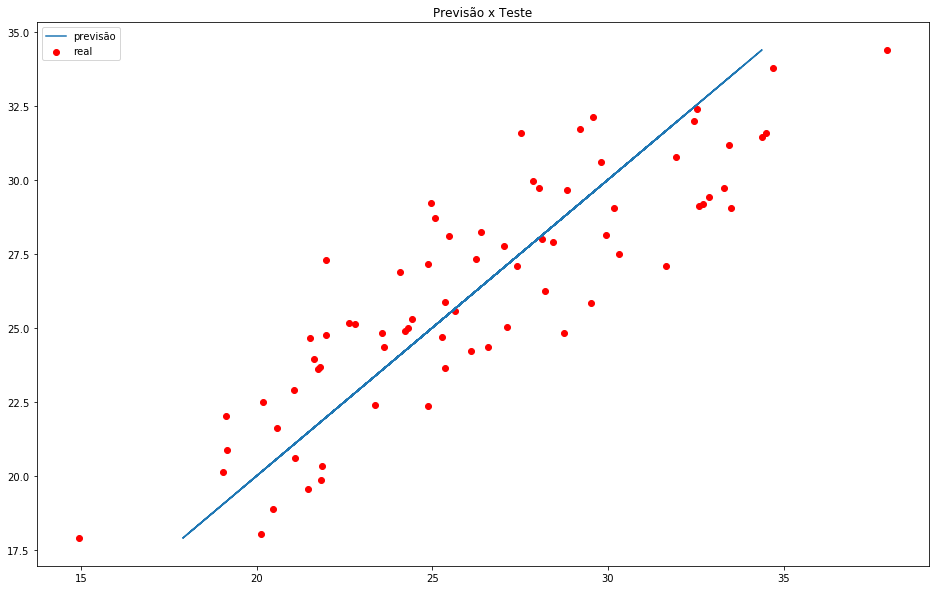

In [502]:
plt.figure(figsize=(16, 10))

plt.plot(y_pred,y_pred)
plt.scatter(y_test,y_pred, c='r', marker='o')
plt.legend(['previsão','real']);
plt.title("Previsão x Teste")
#plt.grid(ls='-.', lw=0.2, c='k');


Text(0.5, 1.0, 'Previsão x Treino')

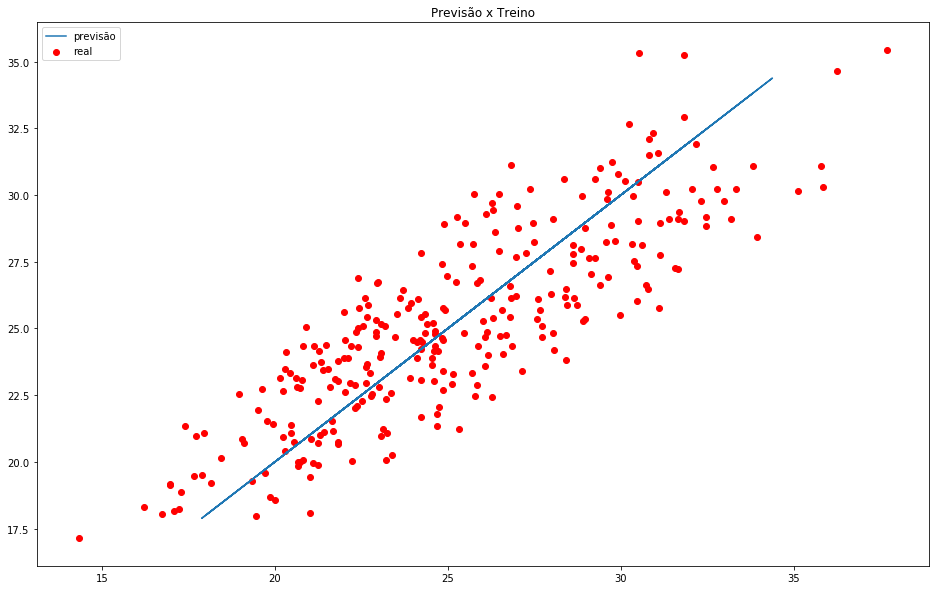

In [501]:
plt.figure(figsize=(16, 10))

plt.plot(y_pred,y_pred)
plt.scatter(y_train,regr.predict(X_train), c='r', marker='o')
plt.legend(['previsão','real']);
plt.title("Previsão x Treino")
#plt.grid(ls='-.', lw=0.2, c='k');


In [488]:
choosen_values = ["t_maxima","fim_de_semana"]

X = df[choosen_values]
X.fim_de_semana = X.fim_de_semana.astype("int64") 
y = df['consumo'].values

#oneH = OneHotEncoder(categorical_features=[2])
sSC = StandardScaler()

#X = oneH.fit_transform(X).toarray()
X = sSC.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True )

regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

info(y_test, y_pred, 'LinearRegression') 


LinearRegression    
    
-----------------------------------------------------------------
          
Mean squared error | 6.930424972020404
r2 Score           | 0.6872421751856912        
          
.................................................................
y-test max         | 37.937
y-test min         | 14.94
y-test mean        | 26.314383561643833 
y-test var         | 22.159077798085946
.................................................................
                
Prediction LinearRegression max  | 34.25050184770284
Prediction LinearRegression min  | 17.758603880593494
Prediction LinearRegression Mean | 26.319330160691443
Prediction LinearRegression Var  | 15.294670157950954

          
-----------------------------------------------------------------



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [489]:
list(zip(choosen_values, regr.coef_))

[('t_maxima', 2.916481110569186), ('fim_de_semana', 2.3450068883382134)]

In [490]:
choosen_values = ["t_maxima"]

X = df[choosen_values]
#X.fim_de_semana = X.fim_de_semana.astype("int64") 
y = df['consumo'].values

#oneH = OneHotEncoder(categorical_features=[2])
sSC = StandardScaler()

#X = oneH.fit_transform(X).toarray()
X = sSC.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True )

regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

info(y_test, y_pred, 'LinearRegression') 


LinearRegression    
    
-----------------------------------------------------------------
          
Mean squared error | 13.75275855221921
r2 Score           | 0.379362323760281        
          
.................................................................
y-test max         | 37.937
y-test min         | 14.94
y-test mean        | 26.314383561643833 
y-test var         | 22.159077798085946
.................................................................
                
Prediction LinearRegression max  | 30.774352766288658
Prediction LinearRegression min  | 19.4933035400857
Prediction LinearRegression Mean | 25.64691881754657
Prediction LinearRegression Var  | 6.874572877599358

          
-----------------------------------------------------------------



In [491]:
list(zip(choosen_values, regr.coef_))

[('t_maxima', 2.732452358174501)]